In [ ]:
from examples.train_model import main
import torch 
import importlib
from examples.benchmark import local_get_args
from utils.rng import set_seed
from examples.train_and_visu_non_recurrent import evaluate_config
import matplotlib.pyplot as plt
import numpy as np
import os 
import geopandas as gpd
import datetime 
from calendar_class import is_morning_peak,is_evening_peak,is_weekday

def plot_heatmap(M, xlabel,ylabel,title=None,cmap='hot',figsize=(15, 15)):
    fig, ax = plt.subplots(figsize=figsize)
    heatmap = ax.imshow(M, cmap=cmap, interpolation='nearest', aspect='auto')

    ax.set_xticks(range(len(xlabel)), labels=xlabel,
                  rotation=45, ha="right", rotation_mode="anchor")
    ax.set_yticks(range(len(ylabel)), labels=ylabel)

    fig.colorbar(heatmap,ax=ax)
    if title:
        ax.set_title(title)
    fig.tight_layout()
    plt.show()


/root/anaconda3/envs/pytorch-2.0.1/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Training and Hyper-parameter tuning with Ray is not possible



In [ ]:
import os 
import importlib 
path = os.path.expanduser('~/prediction-validation/constants/config_by_datasets')
print(path)
os.listdir(path)



path = '/home/rrochas/prediction-validation/constants/config_by_datasets/subway_in/STGCN'
print(os.listdir(path))

print(os.getcwd())

module = importlib.import_module(f"../constants.config_by_datasets.subway_in.subway_in_calendar_embedding.py",)

/home/rrochas/prediction-validation/constants/config_by_datasets
['subway_in.py', 'subway_in_calendar_embedding.py', 'subway_in_calendar_embedding_netmob_POIs.py', '__init__.py', '__pycache__']
/home/rrochas/prediction-validation


TypeError: the 'package' argument is required to perform a relative import for '../constants.config_by_datasets.subway_in.subway_in_calendar_embedding.py'

## Analysing Subway-In

In [2]:
station = ['PAR']
target_data = 'subway_in' # 'subway_in' # 
model_name = 'STAEformer' # 'STGCN', 'ASTGCN' # 'STGformer' #'STAEformer' # 'DSTRformer'

config_file = importlib.import_module(f"constants.config_by_datasets.{target_data}.{model_name}")
importlib.reload(config_file)
modification = config_file.config
SEED = config_file.SEED

modification.update({'num_workers' : 4, # 0,1,2, 4, 6, 8 ... A l'IDRIS ils bossent avec 6 num workers par A100 80GB
                    'persistent_workers' : True ,# False 
                    'pin_memory' : True ,# False 
                    'prefetch_factor' : 4, # None, 2,3,4,5 ... 
                    'drop_last' : False,  # True
                    'mixed_precision' : False, # True # False
                    'torch_compile' : 'compile', # 'compile' # 'jit_script' #'trace' # False
                    'device': torch.device('cuda:0'),
                    'epochs': 200
})

args_init = local_get_args(model_name,
                args_init = None,
                dataset_names=modification['dataset_names'],
                dataset_for_coverage=modification['dataset_for_coverage'],
                modification = modification)

set_seed(SEED)


# Run the script
fold_to_evaluate=[args_init.K_fold-1]

if False:
    trial_id = f"{args_init.model_name}_{'_'.join(args_init.dataset_names)}_fold_{str(fold_to_evaluate[0])}_epochs_{args_init.epochs}"
    save_folder = f"K_fold_validation/training_wo_HP_tuning/{trial_id}"
    print(f"Save folder: {save_folder}")
    trainer,ds,model,args = main(fold_to_evaluate,save_folder,modification)

training_mode_to_visualise = ['test'] # ['test','valid','train']
(trainer,ds,ds_no_shuffle,args) = evaluate_config(args_init=args_init,
                                                  modification=modification,
                                                  fold_to_evaluate= fold_to_evaluate,
                                                  station=station,
                                                   training_mode_to_visualise=training_mode_to_visualise,
                                                   type_POIs = ['iris','iris','iris'],#['iris','iris','iris','iris','iris'],  #'stadium'
                                                   spatial_units = ['Charmettes', 'Charles Hernu', 'Les Brotteaux'], #['Charmettes', 'Charles Hernu', 'Les Brotteaux', 'Bellecombe-Thiers', 'Tonkin Sud'],  #'Matmut Stadium Gerland',
                                                   apps = ['Deezer'], #['Instagram','Google_Maps','Twitter'],
                                                   POI_or_stations = ['POI','POI','POI'],#['POI','POI','POI','POI','POI',], #'POI',
                                                   transfer_modes =['DL'], #['DL','UL'],
                                                   expanded= '',
                                                   individual_poi = False,
                                                   sum_ts_pois = True
                                                   )

----------------------------------------
Loading the Complete Dataset for K-fold splitting
Coverage Period: 7392 elts between 2019-03-16 00:00:00 and 2019-05-31 23:45:00
Invalid dates within this fold: 776

>>>Tackle Target dataset: subway_in
   Load data from: //home/rrochas/../../data/rrochas/prediction_validation/subway_in/subway_in.csv
   Init Dataset: 'torch.Size([7392, 40]). 0 Nan values
   TRAIN contextual_ds: torch.Size([2819, 40, 7])
   VALID contextual_ds: torch.Size([940, 40, 7])
   TEST contextual_ds: torch.Size([939, 40, 7])

 Loading calendar inputs ...

>>>Tackle Contextual dataset:  netmob_POIs
Netmob_T.size():  torch.Size([7392, 430])
Restraining all datasets to train common dates: 2819 dates
Restraining all datasets to valid common dates: 940 dates
Restraining all datasets to test common dates: 939 dates
kwargs_i: {'need_global_attn': True, 'stacked_contextual': True, 'NetMob_selected_apps': ['Deezer'], 'NetMob_transfer_mode': ['DL'], 'NetMob_selected_tags': ['iris'],

/root/anaconda3/envs/pytorch-2.0.1/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Epoch: 23     Train Loss: 21.211863763707036 Val Loss: 26.090607663418385
Epoch: 45     Train Loss: 16.750066101572198 Val Loss: 24.507261430456282
Epoch: 67     Train Loss: 14.000517591088746 Val Loss: 24.001043757986515
Epoch: 89     Train Loss: 11.890457489931148 Val Loss: 24.292312508441032
Epoch: 112     Train Loss: 10.312536643218724 Val Loss: 23.980643828371736
Epoch: 134     Train Loss: 9.274345206470091 Val Loss: 23.97524168136272
Epoch: 156     Train Loss: 8.490031749824126 Val Loss: 24.054152030133185
Epoch: 178     Train Loss: 7.876106408353645 Val Loss: 23.879109492200485
Epoch: 200     Train Loss: 7.367980065435415 Val Loss: 23.76343028291743

Training Throughput:589.53 sequences per seconds
>>> Training complete in: 0:18:51.339771
>>> Training (61.94%) performance time: min 0.01 avg 2.41e-02 seconds (+/- 1.14e-01)
>>> Loading (35.97%) performance time: min 0.00 avg 1.56e-02 seconds (+/- 1.78e-01)
>>> Forward  (26.25%) performance time: 1.10e-02 seconds (+/- 6.70e-02)
>>>

Loading BokehJS ...

#### Analysing queue of error distribution:

In [7]:
training_mode = 'test'

Preds,Y_true,_ = trainer.testing(ds.normalizer, training_mode =training_mode)
abs_error = abs(Preds - Y_true)
 
predicted_dates = getattr(ds.tensor_limits_keeper,f"df_verif_{training_mode}").iloc[:,-args.step_ahead//args.horizon_step:]

In [8]:
horizon = args.step_ahead-1
predicted_dates_h = predicted_dates.iloc[:,horizon].reset_index(drop=True)


peak_hours_working_days = predicted_dates_h[(is_morning_peak(predicted_dates_h) | is_evening_peak(predicted_dates_h) )& 
                                            is_weekday(predicted_dates_h)                    
                                            ]

morning_working_days = predicted_dates_h[is_morning_peak(predicted_dates_h)& 
                                            is_weekday(predicted_dates_h)                    
                                            ]

evening_working_days = predicted_dates_h[is_evening_peak(predicted_dates_h)& 
                                        is_weekday(predicted_dates_h)                    
                                            ]

off_peak_working_days = predicted_dates_h[~(is_morning_peak(predicted_dates_h) | is_evening_peak(predicted_dates_h)) & 
                                            is_weekday(predicted_dates_h)                    
                                            ]


In [9]:
series,series_dates = {},{}
for index_dates,moment in zip([morning_working_days,evening_working_days,peak_hours_working_days,off_peak_working_days],['morning','evening','peak_hours','off_peak']):
    print(f"Evaluating {moment} moments")
    tensor_index = torch.Tensor(index_dates.index).long()
    abs_error_moment = torch.index_select(abs_error,0,tensor_index)
    mean_abs_error_moment = abs_error_moment.mean(axis=[0,1]).numpy()
    print(f"Mean absolute error for {moment} at horizon {'/'.join(list(map(str,list(range(args.horizon_step,args.step_ahead+1,args.horizon_step)))))}: {mean_abs_error_moment}")
    
    # Plot heatmap
    abs_error_moment_h = abs_error_moment[...,horizon]

    series.update({moment : abs_error_moment_h})
    series_dates.update({moment : index_dates})

Evaluating morning moments
Mean absolute error for morning at horizon 1/2/3/4: [30.709227 35.442738 40.67718  43.579735]
Evaluating evening moments
Mean absolute error for evening at horizon 1/2/3/4: [35.070053 36.318325 37.98455  40.6182  ]
Evaluating peak_hours moments
Mean absolute error for peak_hours at horizon 1/2/3/4: [33.30895  35.964725 39.07196  41.814205]
Evaluating off_peak moments
Mean absolute error for off_peak at horizon 1/2/3/4: [21.879608 22.14587  22.105625 22.317822]


Moment: morning, Data shape: torch.Size([63, 40])
Moment: evening, Data shape: torch.Size([93, 40])
Moment: off_peak, Data shape: torch.Size([571, 40])


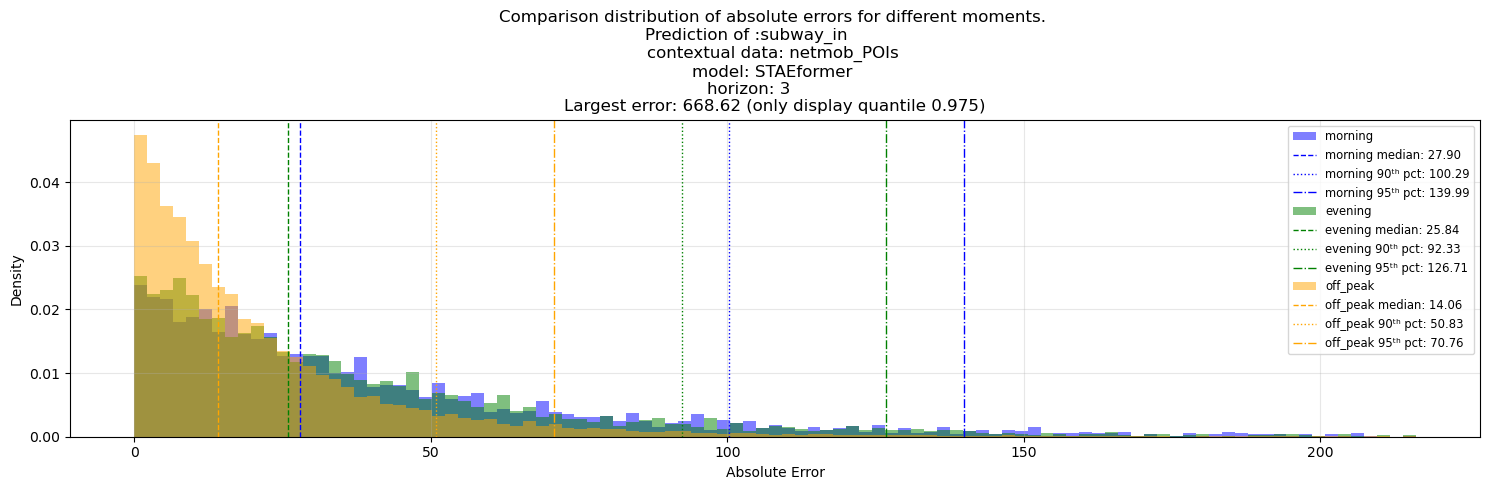

In [10]:
colors = {
    'peak_hours'  : 'red',
    'evening'    : 'green',
    'morning'   : 'blue',
    'off_peak' :   'orange',
}

# Calcul d'un jeu de bins unique
qmax = 0.975
all_data = np.concatenate(list(series.values()))[...,horizon]
all_dates = np.concatenate(list(series_dates.values()))
bins = np.linspace(all_data.min(), np.quantile(all_data,qmax), 100)

plt.figure(figsize=(15, 5))

# Dictionnaires pour organiser les séries et leurs couleurs
for moment in ['morning', 'evening', 'off_peak']:
    print(f"Moment: {moment}, Data shape: {series[moment].shape}")
    abs_error_moment_h = series[moment].reshape(-1)

    index_dates = series_dates[moment]

    if False: 
        plot_heatmap(abs_error_moment_h.numpy(), 
                    xlabel =ds.spatial_unit , 
                    ylabel = index_dates,
                    title=f"Absolute Error Heatmap - {moment.capitalize()}",
                    figsize=(15, 10)) 

    plt.hist(abs_error_moment_h,
            bins=bins,
            density=True,
            alpha=0.5,               # 50% de transparence
            color=colors[moment],
            label=moment)

    # Calcul et ajout des lignes verticales
    med  = np.median(abs_error_moment_h)
    q90  = np.quantile(abs_error_moment_h, 0.90)
    q95  = np.quantile(abs_error_moment_h, 0.95)
    plt.axvline(med, color=colors[moment], linestyle='--', linewidth=1,
                label=f'{moment} median: {med:.2f}')
    plt.axvline(q90, color=colors[moment], linestyle=':', linewidth=1,
                label=f'{moment} 90ᵗʰ pct: {q90:.2f}')
    plt.axvline(q95, color=colors[moment], linestyle='-.', linewidth=1,
                label=f'{moment} 95ᵗʰ pct: {q95:.2f}')

# Finitions
plt.title(f"Comparison distribution of absolute errors for different moments. \nPrediction of :{args.target_data} \
          \ncontextual data: {', '.join(args.contextual_dataset_names)} \nmodel: {args.model_name} \nhorizon: {horizon}\
          \nLargest error: {abs_error_moment_h.max().item():.2f} (only display quantile {qmax})")
plt.xlabel("Absolute Error")
plt.ylabel("Density")
plt.legend(loc='upper right', fontsize='small')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

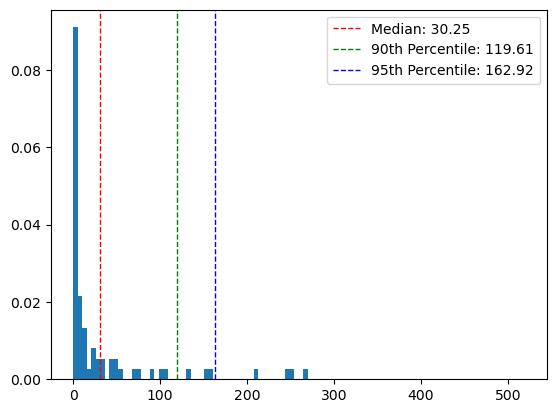

In [ ]:

for abs_error_moment_h in [abs_error_moment_h1,abs_error_moment_2]:
    hist,bins = np.histogram(abs_error_moment_h,bins=100)
    plt.hist(hist,bins,density=True)
    ## Add vertical axis to median, quantile 90 and quantile 95
    median = np.median(abs_error_moment_h)
    quantile_90 = np.quantile(abs_error_moment_h, 0.9)
    quantile_95 = np.quantile(abs_error_moment_h, 0.95)
    plt.axvline(median, color='r', linestyle='dashed', linewidth=1, label=f'Median: {median:.2f}')
    plt.axvline(quantile_90, color='g', linestyle='dashed', linewidth=1, label=f'90th Percentile: {quantile_90:.2f}')
    plt.axvline(quantile_95, color='b', linestyle='dashed', linewidth=1, label=f'95th Percentile: {quantile_95:.2f}')
    plt.legend()
    plt.show()

    ## Superposer les distirbutino entre peak hour, morning hour, reste du temps ; samedi, dimanche:

## Analysing CRITER

In [ ]:
from examples.train_model import main
import torch 
import importlib
from examples.benchmark import local_get_args
from utils.rng import set_seed
from examples.train_and_visu_non_recurrent import evaluate_config
import matplotlib.pyplot as plt
import numpy as np
import os 
import geopandas as gpd

station = [96]
target_data = 'CRITER' # 'subway_in' # 
model_name = 'STAEformer' # 'STGCN', 'ASTGCN' # 'STGformer' #'STAEformer' # 'DSTRformer'

config_file = importlib.import_module(f"constants.config_by_datasets.{target_data}.{model_name}")
importlib.reload(config_file)
modification = config_file.config
SEED = config_file.SEED

modification.update({'num_workers' : 4, # 0,1,2, 4, 6, 8 ... A l'IDRIS ils bossent avec 6 num workers par A100 80GB
                    'persistent_workers' : True ,# False 
                    'pin_memory' : True ,# False 
                    'prefetch_factor' : 4, # None, 2,3,4,5 ... 
                    'drop_last' : False,  # True
                    'mixed_precision' : False, # True # False
                    'torch_compile' : False, # 'compile' # 'jit_script' #'trace' # False
                    'device': torch.device('cuda:0'),
                    'epochs': 40
})

args_init = local_get_args(model_name,
                args_init = None,
                dataset_names=modification['dataset_names'],
                dataset_for_coverage=modification['dataset_for_coverage'],
                modification = modification)

set_seed(SEED)


# Run the script
fold_to_evaluate=[args_init.K_fold-1]

if False:
    trial_id = f"{args_init.model_name}_{'_'.join(args_init.dataset_names)}_fold_{str(fold_to_evaluate[0])}_epochs_{args_init.epochs}"
    save_folder = f"K_fold_validation/training_wo_HP_tuning/{trial_id}"
    print(f"Save folder: {save_folder}")
    trainer,ds,model,args = main(fold_to_evaluate,save_folder,modification)

training_mode_to_visualise = ['test'] # ['test','valid','train']
(trainer,ds,ds_no_shuffle,args) = evaluate_config(args_init=args_init,
                                                  modification=modification,
                                                  fold_to_evaluate= fold_to_evaluate,
                                                  station=station,
                                                   training_mode_to_visualise=training_mode_to_visualise,
                                                   type_POIs = ['iris','iris','iris'],#['iris','iris','iris','iris','iris'],  #'stadium'
                                                   spatial_units = ['Charmettes', 'Charles Hernu', 'Les Brotteaux'], #['Charmettes', 'Charles Hernu', 'Les Brotteaux', 'Bellecombe-Thiers', 'Tonkin Sud'],  #'Matmut Stadium Gerland',
                                                   apps = ['Deezer'], #['Instagram','Google_Maps','Twitter'],
                                                   POI_or_stations = ['POI','POI','POI'],#['POI','POI','POI','POI','POI',], #'POI',
                                                   transfer_modes =['DL'], #['DL','UL'],
                                                   expanded= '',
                                                   individual_poi = False,
                                                   sum_ts_pois = True
                                                   )